In [12]:
import os
import numpy as np
import pandas as pd
from MCForecastTools import MCSimulation
from pathlib import Path
%matplotlib inline
import alpaca_trade_api as tradeapi
import requests
from dotenv import load_dotenv
load_dotenv()


True

In [13]:
aapl_path = Path('Data/AAPL_daily_price.csv')
amazon_path = Path('Data/AMZN_daily_price.csv')
dowj_path = Path('Data/DOWJ_daily_price.csv')
fb_path = Path('Data/FB_daily_price.csv')
msft_path = Path('Data/MSFT_daily_price.csv')
nasdaq_path = Path('Data/NASDAQ_daily_price.csv')
nflx_path = Path('Data/NFLX_daily_price.csv')
sp500_path = Path('Data/SP500_daily_price.csv')
tsla_path = Path('Data/TSLA_daily_price.csv')
vix_path = Path('Data/VIX_daily_price.csv')
wmt_path = Path('Data/WMT_daily_price.csv')

In [14]:
AAPL_csv = pd.read_csv(aapl_path, index_col= 'Date',infer_datetime_format = True, parse_dates = True)
AMAZ_csv = pd.read_csv(amazon_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
DOWJ_csv = pd.read_csv(dowj_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
FB_csv = pd.read_csv(fb_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
MSFT_csv = pd.read_csv(msft_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
NASDAQ_csv = pd.read_csv(nasdaq_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
NFLX_csv = pd.read_csv(nflx_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
SP500_csv = pd.read_csv(sp500_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
TSLA_csv = pd.read_csv(tsla_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
VIX_csv = pd.read_csv(vix_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
WMT_csv = pd.read_csv(wmt_path, index_col='Date',infer_datetime_format = True, parse_dates = True)

#rename columns
AAPL_csv = AAPL_csv.rename(columns={'Close':'AAPL'})
AMAZ_csv = AMAZ_csv.rename(columns={'Close':'AMZN'})
DOWJ_csv = DOWJ_csv.rename(columns={'Close':'DOWJ'})
FB_csv = FB_csv.rename(columns={'Close':'FB'})
MSFT_csv = MSFT_csv.rename(columns={'Close':'MSFT'})
NASDAQ_csv = NASDAQ_csv.rename(columns={'Close':'NASDAQ'})
NFLX_csv = NFLX_csv.rename(columns={'Close':'NFLX'})
SP500_csv = SP500_csv.rename(columns={'Close':'S&P500'})
TSLA_csv = TSLA_csv.rename(columns={'Close':'TSLA'})
VIX_csv = VIX_csv.rename(columns={'Close':'VIX'})
WMT_csv = WMT_csv.rename(columns={'Close':'WMT'})

NASDAQ_csv.index = pd.to_datetime(NASDAQ_csv.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
VIX_csv.index = pd.to_datetime(VIX_csv.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
SP500_csv.index = pd.to_datetime(SP500_csv.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
DOWJ_csv.index = pd.to_datetime(DOWJ_csv.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')



In [15]:
stocks = pd.concat([AAPL_csv,AMAZ_csv,FB_csv,MSFT_csv,NFLX_csv,TSLA_csv,WMT_csv], join='inner', axis='columns')
stocks = stocks.drop(columns='Symbol')

stocks.index = pd.to_datetime(stocks.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
stocks.head()

,AAPL,AMZN,FB,MSFT,NFLX,TSLA,WMT
Date,,,,,,,
2015-01-02,27.33,308.52,78.45,46.76,49.85,43.86,85.90
2015-01-05,26.56,302.19,77.19,46.33,47.31,42.02,85.65
2015-01-06,26.57,295.29,76.15,45.65,46.50,42.26,86.31
2015-01-07,26.94,298.42,76.15,46.23,46.74,42.19,88.60
2015-01-08,27.97,300.46,78.18,47.59,47.78,42.12,90.47


In [16]:
indexes = pd.concat([NASDAQ_csv,DOWJ_csv,SP500_csv,VIX_csv],join='inner',axis='columns')
indexes = indexes.drop(columns='Symbol')
indexes.head()


,NASDAQ,DOWJ,S&P500,VIX
Date,,,,
2015-01-02,4726.81,17832.99,2058.20,17.79
2015-01-05,4652.57,17501.65,2020.58,19.92
2015-01-06,4592.74,17371.64,2002.61,21.12
2015-01-07,4650.47,17584.52,2025.90,19.31
2015-01-08,4736.19,17907.87,2062.14,17.01


In [17]:


daily_change_indexes = indexes.pct_change()

##remove all null values#

daily_change_indexes = daily_change_indexes.dropna()
daily_change_indexes.head()


,NASDAQ,DOWJ,S&P500,VIX
Date,,,,
2015-01-05,-0.015706,-0.018580,-0.018278,0.119730
2015-01-06,-0.012860,-0.007428,-0.008893,0.060241
2015-01-07,0.012570,0.012254,0.011630,-0.085701
2015-01-08,0.018433,0.018388,0.017888,-0.119109
2015-01-09,-0.006782,-0.009521,-0.008404,0.031746


In [18]:
daily_change_stocks = stocks.pct_change()
daily_change_stocks = daily_change_stocks.dropna()
daily_change_stocks.head()


,AAPL,AMZN,FB,MSFT,NFLX,TSLA,WMT
Date,,,,,,,
2015-01-05,-0.028174,-0.020517,-0.016061,-0.009196,-0.050953,-0.041952,-0.002910
2015-01-06,0.000377,-0.022833,-0.013473,-0.014677,-0.017121,0.005712,0.007706
2015-01-07,0.013925,0.010600,0.000000,0.012705,0.005161,-0.001656,0.026532
2015-01-08,0.038233,0.006836,0.026658,0.029418,0.022251,-0.001659,0.021106
2015-01-09,0.001073,-0.011749,-0.005628,-0.008405,-0.015488,-0.018756,-0.012380


In [19]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


In [20]:
today = pd.Timestamp('2015-01-05', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-30', tz='America/New_York').isoformat()
# Set the tickers
tickers = ["AAPL",'AMZN','FB','MSFT','NFLX','TSLA','WMT']

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
tickers_data = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = end_date,
    ).df
tickers_data

MC_keys = {}

for index, value in enumerate(tickers):
    weights=[0, 0, 0, 0, 0, 0, 0]
    weights[index]=1

    num_sims = 500 
    
    MC_5years = MCSimulation(
    portfolio_data=tickers_data,
    
    num_simulation=num_sims,
    num_trading_days=252*5)
    
    MC_5years.calc_cumulative_return()
    MC_keys[value]=MC_5years




Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

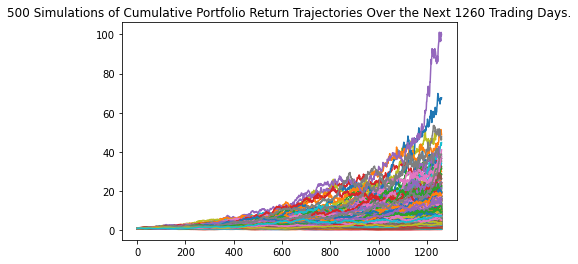

In [23]:
MC_keys['AAPL'].plot_simulation()


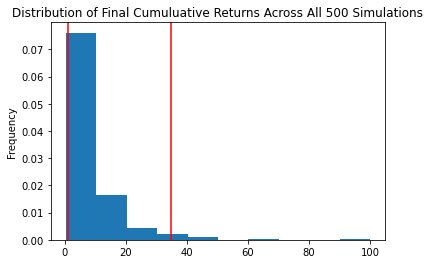

In [24]:
MC_keys['AAPL'].plot_distribution()

In [25]:
tbl_aapl = MC_keys['AAPL'].summarize_cumulative_return()
tbl_aapl

count           500.000000
mean              8.659269
std               9.247518
min               0.420477
25%               3.368606
50%               5.932797
75%              10.139789
max             100.028531
95% CI Lower      1.069257
95% CI Upper     34.697263
Name: 1260, dtype: float64

In [26]:
initial_investment = 10000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl_aapl[8]*10000,2)
ci_upper = round(tbl_aapl[9]*10000,2)
# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the Apple"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the Apple over the next 5 years will end within in the range of $10692.57 and $346972.63


In [27]:
# Compute summary statistics from the simulated daily returns
aapl_simulated_returns_data = {
    "mean": list(MC_keys['AAPL'].simulated_return.mean(axis=1)),
    "median": list(MC_keys['AAPL'].simulated_return.median(axis=1)),
    "min": list(MC_keys['AAPL'].simulated_return.min(axis=1)),
    "max": list(MC_keys['AAPL'].simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
aapl_df_simulated_returns = pd.DataFrame(aapl_simulated_returns_data)

# Display sample data
aapl_df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.003889,1.003686,0.938261,1.085991
2,1.004785,1.003986,0.918924,1.105352
3,1.006276,1.004476,0.893243,1.170293
4,1.007716,1.007773,0.866696,1.144308


In [28]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
aapl_cumulative_pnl = initial_investment * aapl_df_simulated_returns

# Display sample data
aapl_cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10038.885913,10036.858750,9382.611354,10859.906334
2,10047.849460,10039.855941,9189.242424,11053.517395
3,10062.756306,10044.764902,8932.427449,11702.931290
4,10077.155229,10077.730046,8666.962763,11443.077644


In [29]:
aapl_cumulative_pnl.to_csv(Path('Data/aapl_cumulative_returns.csv'))

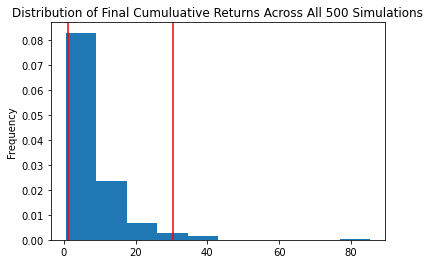

In [30]:
MC_keys['AMZN'].plot_distribution()


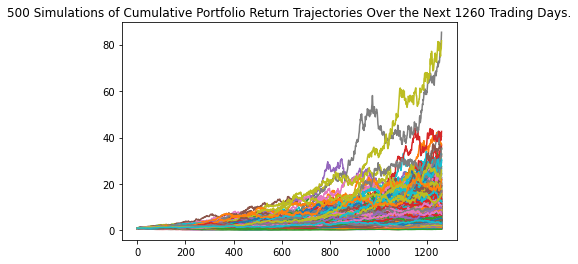

In [31]:
MC_keys['AMZN'].plot_simulation()

In [32]:
tbl_amzn = MC_keys['AMZN'].summarize_cumulative_return()
tbl_amzn

count           500.000000
mean              8.295977
std               8.496874
min               0.555816
25%               3.416790
50%               5.661295
75%              10.174370
max              85.329602
95% CI Lower      1.136460
95% CI Upper     30.396655
Name: 1260, dtype: float64

In [33]:
initial_investment = 10000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl_amzn[8]*10000,2)
ci_upper = round(tbl_amzn[9]*10000,2)
# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the Amazon"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the Amazon over the next 5 years will end within in the range of $11364.6 and $303966.55


In [34]:
# Compute summary statistics from the simulated daily returns
amzn_simulated_returns_data = {
    "mean": list(MC_keys['AMZN'].simulated_return.mean(axis=1)),
    "median": list(MC_keys['AMZN'].simulated_return.median(axis=1)),
    "min": list(MC_keys['AMZN'].simulated_return.min(axis=1)),
    "max": list(MC_keys['AMZN'].simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
amzn_df_simulated_returns = pd.DataFrame(amzn_simulated_returns_data)

# Display sample data
amzn_df_simulated_returns.head()

# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
amzn_cumulative_pnl = initial_investment * amzn_df_simulated_returns

# Display sample data
amzn_cumulative_pnl.head()

amzn_cumulative_pnl.to_csv(Path('Data/amzn_cumulative_returns.csv'))

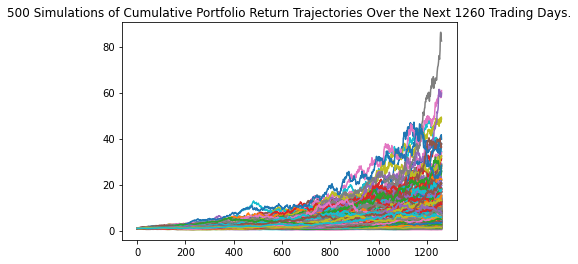

In [35]:
MC_keys['FB'].plot_simulation()

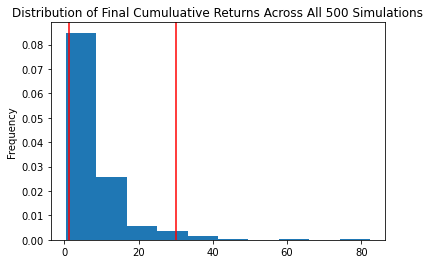

In [36]:
MC_keys['FB'].plot_distribution()

In [37]:
tbl_fb = MC_keys['FB'].summarize_cumulative_return()
tbl_fb

count           500.000000
mean              8.355207
std               8.241287
min               0.405391
25%               3.567333
50%               6.187102
75%              10.005770
max              82.397326
95% CI Lower      1.272250
95% CI Upper     30.196682
Name: 1260, dtype: float64

In [38]:
initial_investment = 10000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl_fb[8]*10000,2)
ci_upper = round(tbl_fb[9]*10000,2)
# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the Facebook"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the Facebook over the next 5 years will end within in the range of $12722.5 and $301966.82


In [39]:
# Compute summary statistics from the simulated daily returns
fb_simulated_returns_data = {
    "mean": list(MC_keys['FB'].simulated_return.mean(axis=1)),
    "median": list(MC_keys['FB'].simulated_return.median(axis=1)),
    "min": list(MC_keys['FB'].simulated_return.min(axis=1)),
    "max": list(MC_keys['FB'].simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
fb_df_simulated_returns = pd.DataFrame(fb_simulated_returns_data)

# Display sample data
fb_df_simulated_returns.head()


,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.001349,1.002031,0.938119,1.068429
2,1.003142,1.004325,0.888949,1.116986
3,1.003879,0.998594,0.880953,1.130124
4,1.005364,1.000676,0.859790,1.176412


In [40]:
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
fb_cumulative_pnl = initial_investment * fb_df_simulated_returns

fb_cumulative_pnl.to_csv(Path('Data/fb_cumulative_returns.csv'))

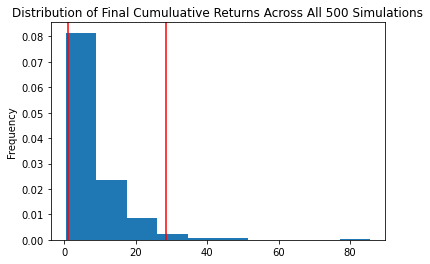

In [41]:
MC_keys['MSFT'].plot_distribution()

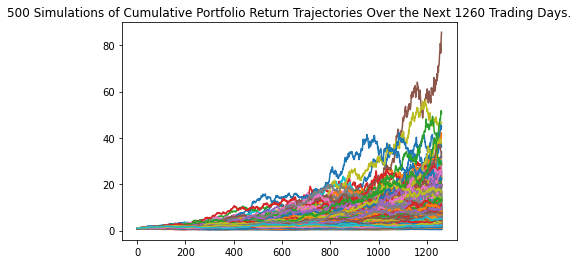

In [42]:
MC_keys['MSFT'].plot_simulation()

In [43]:
tbl_msft = MC_keys['MSFT'].summarize_cumulative_return()
tbl_msft

count           500.000000
mean              8.283364
std               8.147975
min               0.443643
25%               3.229385
50%               5.775440
75%              10.363011
max              85.651899
95% CI Lower      1.116938
95% CI Upper     28.597209
Name: 1260, dtype: float64

In [44]:
initial_investment = 10000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl_msft[8]*10000,2)
ci_upper = round(tbl_msft[9]*10000,2)
# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the Microsoft"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the Microsoft over the next 5 years will end within in the range of $11169.38 and $285972.09


In [45]:
# Compute summary statistics from the simulated daily returns
msft_simulated_returns_data = {
    "mean": list(MC_keys['MSFT'].simulated_return.mean(axis=1)),
    "median": list(MC_keys['MSFT'].simulated_return.median(axis=1)),
    "min": list(MC_keys['MSFT'].simulated_return.min(axis=1)),
    "max": list(MC_keys['MSFT'].simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
msft_df_simulated_returns = pd.DataFrame(msft_simulated_returns_data)

# Display sample data
msft_df_simulated_returns.head()


,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.001460,1.001195,0.928657,1.068272
2,1.003905,1.004041,0.906519,1.088441
3,1.003757,1.004481,0.880060,1.117107
4,1.003199,1.006962,0.870089,1.164142


In [46]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
msft_cumulative_pnl = initial_investment * msft_df_simulated_returns

msft_cumulative_pnl.to_csv(Path('Data/msft_cumulative_returns.csv'))

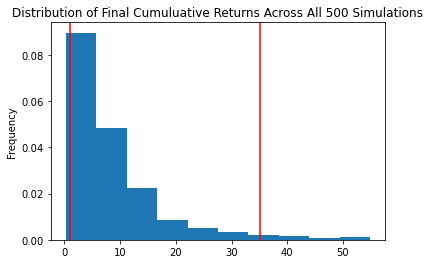

In [47]:
MC_keys['NFLX'].plot_distribution()

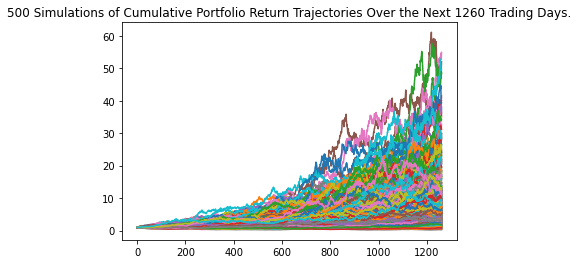

In [48]:
MC_keys['NFLX'].plot_simulation()

In [49]:
tbl_nflx = MC_keys['NFLX'].summarize_cumulative_return()
tbl_nflx

count           500.000000
mean              8.690052
std               8.609076
min               0.258946
25%               3.264448
50%               5.835523
75%              11.011564
max              54.870871
95% CI Lower      1.027322
95% CI Upper     35.122686
Name: 1260, dtype: float64

In [50]:
initial_investment = 10000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl_nflx[8]*10000,2)
ci_upper = round(tbl_nflx[9]*10000,2)
# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the Netflix"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the Netflix over the next 5 years will end within in the range of $10273.22 and $351226.86


In [51]:
# Compute summary statistics from the simulated daily returns
nflx_simulated_returns_data = {
    "mean": list(MC_keys['NFLX'].simulated_return.mean(axis=1)),
    "median": list(MC_keys['NFLX'].simulated_return.median(axis=1)),
    "min": list(MC_keys['NFLX'].simulated_return.min(axis=1)),
    "max": list(MC_keys['NFLX'].simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
nflx_simulated_returns = pd.DataFrame(nflx_simulated_returns_data)

# Display sample data
nflx_simulated_returns.head()


,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000799,1.001454,0.922562,1.063701
2,1.001791,1.000291,0.897193,1.109160
3,1.002333,1.002488,0.856147,1.132669
4,1.005742,1.003855,0.832711,1.154199


In [ ]:
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
nflx_cumulative_pnl = initial_investment * nflx_simulated_returns

nflx_cumulative_pnl.to_csv(Path('Data/nflx_cumulative_returns.csv'))

In [ ]:
MC_keys['TSLA'].plot_distribution()

In [ ]:
MC_keys['TSLA'].plot_simulation()

In [ ]:
tbl_tsla = MC_keys['TSLA'].summarize_cumulative_return()
tbl_tsla

In [ ]:
initial_investment = 10000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl_tsla[8]*10000,2)
ci_upper = round(tbl_tsla[9]*10000,2)
# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the Tesla"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

In [ ]:
# Compute summary statistics from the simulated daily returns
tsla_simulated_returns_data = {
    "mean": list(MC_keys['TSLA'].simulated_return.mean(axis=1)),
    "median": list(MC_keys['TSLA'].simulated_return.median(axis=1)),
    "min": list(MC_keys['TSLA'].simulated_return.min(axis=1)),
    "max": list(MC_keys['TSLA'].simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
tsla_simulated_returns = pd.DataFrame(tsla_simulated_returns_data)

# Display sample data
tsla_simulated_returns.head()


In [ ]:
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
tsla_cumulative_pnl = initial_investment * tsla_simulated_returns

tsla_cumulative_pnl.to_csv(Path('Data/tsla_cumulative_returns.csv'))

In [ ]:
MC_keys['WMT'].plot_distribution()

In [ ]:
MC_keys['WMT'].plot_simulation()

In [ ]:
tbl_wmt = MC_keys['WMT'].summarize_cumulative_return()
tbl_wmt

In [ ]:
initial_investment = 10000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl_wmt[8]*10000,2)
ci_upper = round(tbl_wmt[9]*10000,2)
# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the Walmart"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")



In [ ]:
# Compute summary statistics from the simulated daily returns
wmt_simulated_returns_data = {
    "mean": list(MC_keys['WMT'].simulated_return.mean(axis=1)),
    "median": list(MC_keys['WMT'].simulated_return.median(axis=1)),
    "min": list(MC_keys['WMT'].simulated_return.min(axis=1)),
    "max": list(MC_keys['WMT'].simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
wmt_simulated_returns = pd.DataFrame(wmt_simulated_returns_data)

# Display sample data
wmt_simulated_returns.head()


In [ ]:
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
wmt_cumulative_pnl = initial_investment * wmt_simulated_returns

wmt_cumulative_pnl.to_csv(Path('Data/wmt_cumulative_returns.csv'))

In [ ]:
today = pd.Timestamp('2015-01-05', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-30', tz='America/New_York').isoformat()
# Set the tickers
spy_tickers = ['SPY']

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
spy_tickers_data = api.get_barset(
    spy_tickers,
    timeframe,
    start = today,
    end = end_date,
    ).df
spy_tickers_data





In [ ]:

num_sims = 500 
    
SPY_MC_5years = MCSimulation(
    portfolio_data=spy_tickers_data,
    num_simulation=num_sims,
    num_trading_days=252*5)
    
SPY_MC_5years.calc_cumulative_return()


In [ ]:
SPY_MC_5years.plot_distribution()

In [ ]:
SPY_MC_5years.plot_simulation()

In [ ]:
tbl_spy = SPY_MC_5years.summarize_cumulative_return()
tbl_spy

In [ ]:
initial_investment = 10000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl_spy[8]*10000,2)
ci_upper = round(tbl_spy[9]*10000,2)
# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the S&P500"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")



In [ ]:
# Compute summary statistics from the simulated daily returns
spy_simulated_returns_data = {
    "mean": list(SPY_MC_5years.simulated_return.mean(axis=1)),
    "median": list(SPY_MC_5years.simulated_return.median(axis=1)),
    "min": list(SPY_MC_5years.simulated_return.min(axis=1)),
    "max": list(SPY_MC_5years.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
spy_simulated_returns = pd.DataFrame(spy_simulated_returns_data)

# Display sample data
spy_simulated_returns.head()


In [ ]:
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
spy_cumulative_pnl = initial_investment * spy_simulated_returns


spy_cumulative_pnl.to_csv(Path('Data/spy_cumulative_returns.csv'))
spy_cumulative_pnl.head()